# Spore segmentation

## Import module and load demo data

In [19]:
%load_ext autoreload
%autoreload 2

from spores.sporeClass import Spore
spores = Spore(show_output=True)

%run 'scripts/demo_import.py'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Running interactively

Provide the folder where your images are stored:

In [20]:
exp_folder = 'Sporefolder/SporesA/'

Provide the folder where you want to store the analyisis (if it doesn't exist, it is created automatically). A subfolder with the same name as the original experiment folder is created in that folder.

In [21]:
result_folder = 'Results'

Analyse a complete folder. This saves a Pandas dataframe with segmentation information as well as an image of the segmentation for each image:

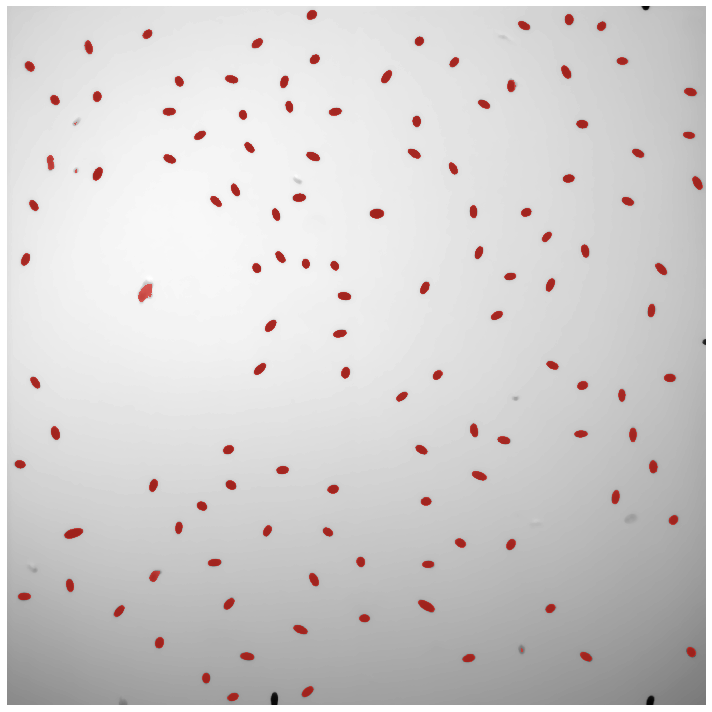

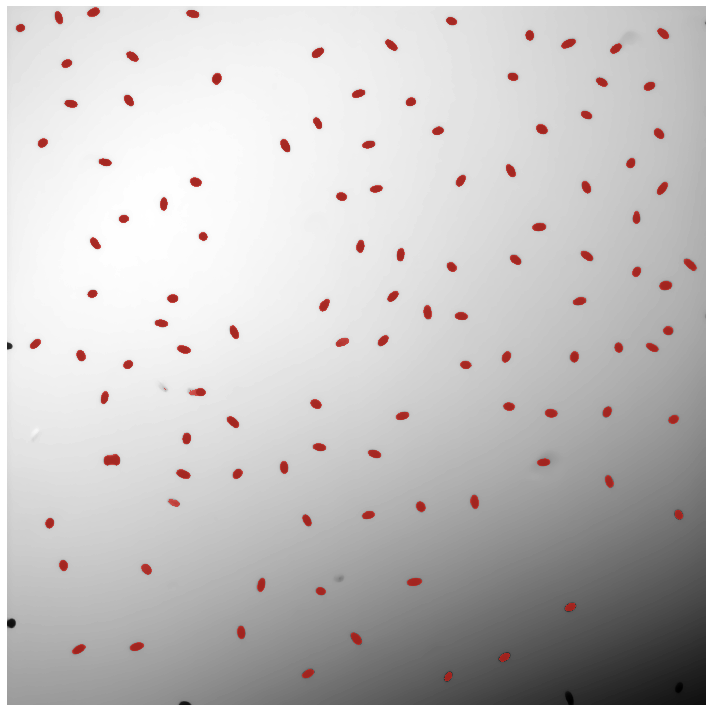

In [22]:
spores.analyse_spore_folder(exp_folder, result_folder)

For a given analysis we now combine all the segmentation information and classify the data into two categories by using expectation maximization in ```the split_categories()``` function.

In the same function, we create a histogram showing the two categories separated by the threshold set by EM. The histogram can be customized by setting different variables.

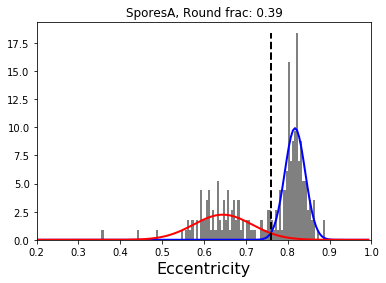

In [23]:
spores.show_legend = False
spores.show_title = True
spores.threshold = None
spores.split_categories(spores.path_to_analysis(exp_folder, result_folder))

Alternatively, the threshold can be set manually, in which case no EM-based Gaussian is shown:

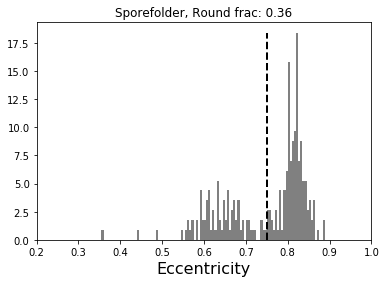

In [11]:
spores.show_legend = False
spores.show_title = True
spores.threshold = 0.75
spores.split_categories(spores.path_to_analysis(exp_folder, result_folder))

Finally we show again the segmentation but now each spore is assigned to one category:

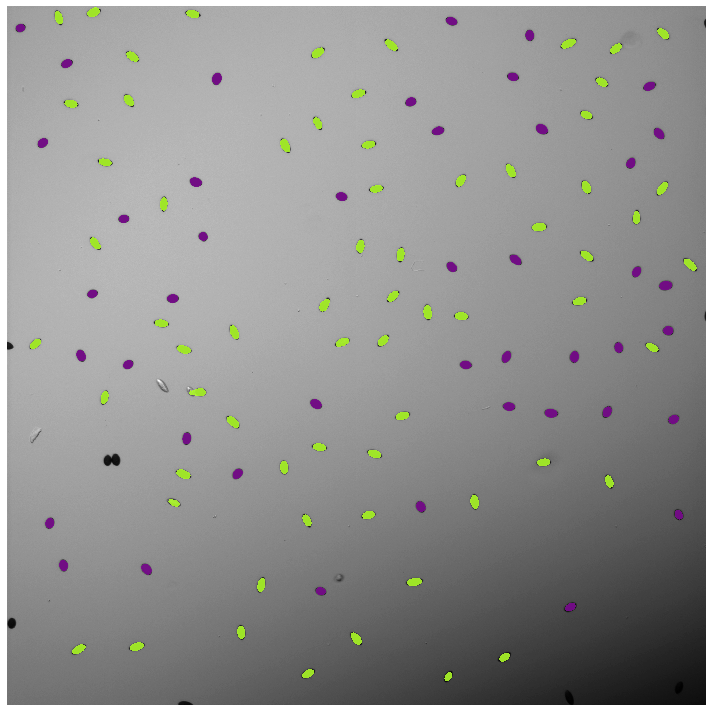

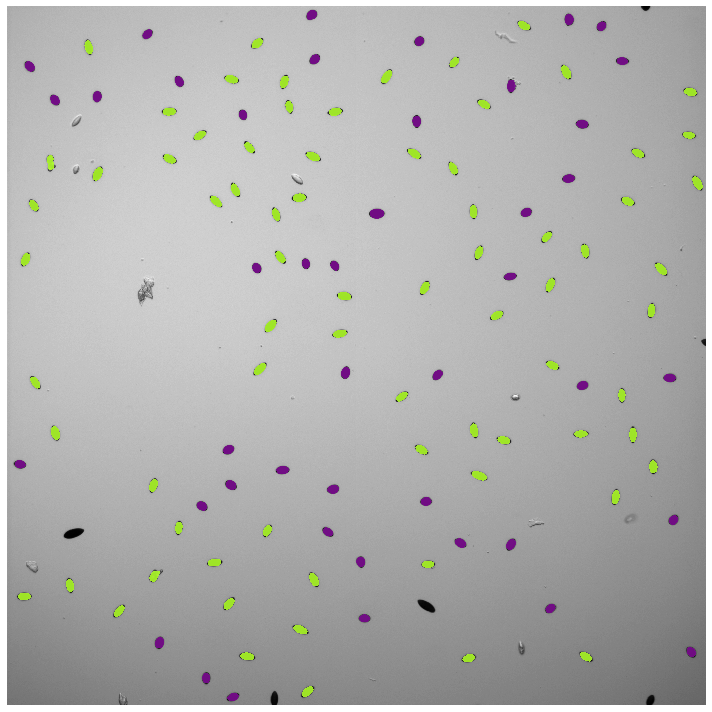

In [24]:
spores.show_output=True
spores.plot_image_categories(exp_folder, result_folder)

## Running as a script

All the above steps can be run as two scripts:
    1. spore_segmentation.py
    2. spore_calling.py
    
Both scripts take as input the folder path containing images and the folder containing results.

First we run the segmentation (you can run that same line from your command line tool withouth the ! sign). You can  have the plots showing up by using the ```--show_output``` flag.

Then we run the classification which takes again the two same folders as arguments. In addition there are several options to use:
- adjust the size limit for spores with the ```--min_area <value>``` and ```--max_area <value>``` flags
- set a manual threshold ```--threshold```
- show the output using ```--show_output```
- add a title to the histogram plot ```--show_title```
- add a legend to the histogram plot ```--show_legend```

In [25]:
!python scripts/spore_segmentation.py 'Sporefolder/SporesA' 'Results_script'


In [27]:
!python scripts/spore_calling.py 'Sporefolder/SporesA' 'Results_script' --max_area 1000 --threshold 0.7 --show_legend --show_title


## Running the full analysis on multiple datasets

The steps above can be combined for multiple experiments by executing the spore_multiexperiment.py script. Here the first argument is a folder containing multiple experiment subfolders:

Sporefolder:
- SporesA
    - spore1.jpg
    - spore2.jpg
- SporesB
    - spore1.jpg
    - spore2.jpg
         
The script goes through all folders and does the full analysis.

The same flags as those available in spore_calling.py (```--show_legend``` etc.) can be used here.

In [29]:
!python scripts/spore_multiexperiment.py 'Sporefolder' 'Results_multi' --show_title
